In [1]:
import pandas as pd
import numpy as np
from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

## Fashion MNIST Data

#### DATA

In [2]:
# URL: https://www.kaggle.com/datasets/zalando-research/fashionmnist/data
data1 = pd.read_csv('../datos/fashion-mnist_train.csv')
data2 = pd.read_csv('../datos/fashion-mnist_test.csv')
data = pd.concat([data1, data2])
data = np.array(data)

In [3]:
labels = ["Tshirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [4]:
m, n = data.shape
np.random.seed(42)  # For reproducibility
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

# El conjunto provisional restante (90%)
remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

Y_train = np.eye(10)[Y_train]
Y_val = np.eye(10)[Y_val]
Y_test = np.eye(10)[Y_test]

In [5]:
# Normalization
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

### Train Data

#### Setup NN

In [6]:
layers_config = [
    {'output_size': 512, 'activation': ReLU},
    {'output_size': 256, 'activation': ReLU},
    {'output_size': 10, 'activation': Softmax}
]

#### SGD Optimizer

In [7]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, X_train.shape[0])
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time:  3.00s | val loss 0.303 | val metric 0.200 |
| Epoch  20 | time:  2.53s | val loss 0.146 | val metric 0.685 |
Early stopping activado en la época  24


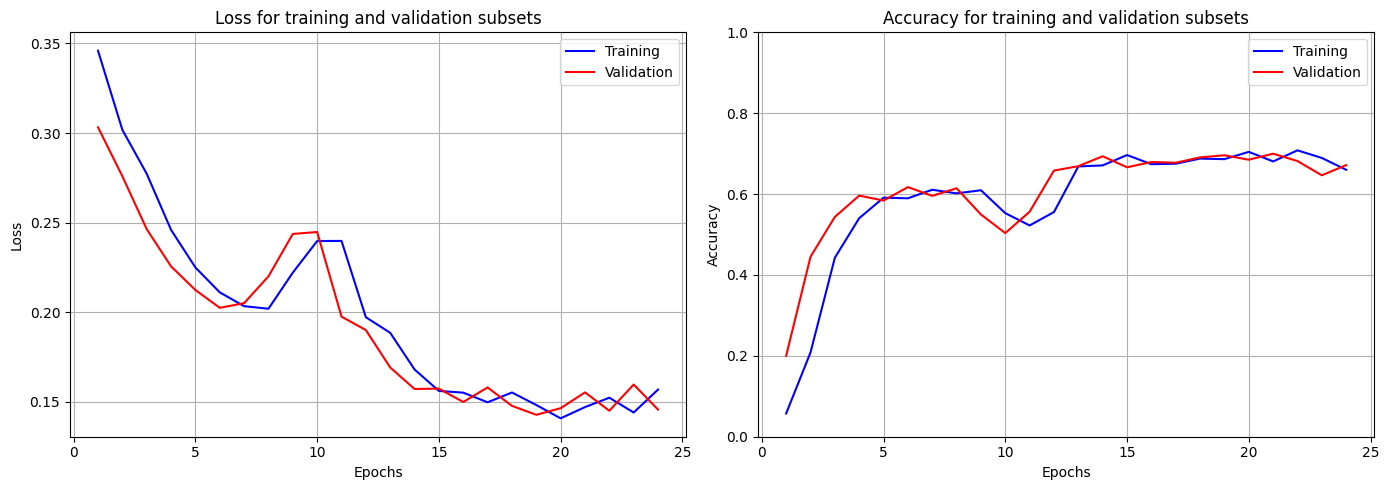

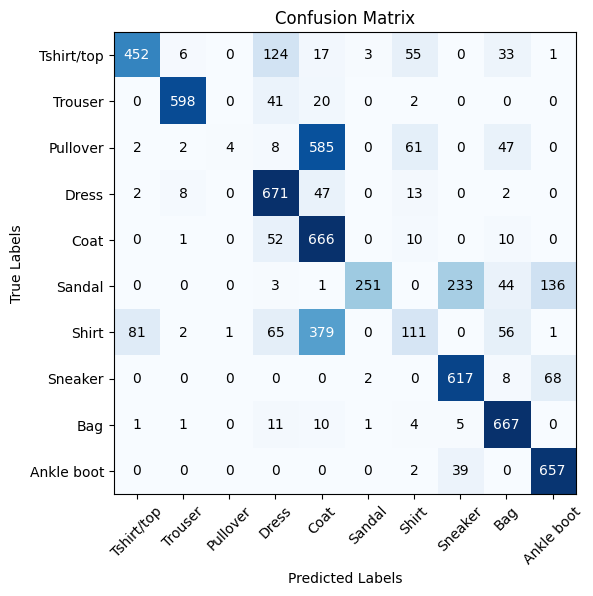

Accuracy: 0.6705714285714286
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.840149  0.654124  0.735557      691
Trouser        0.967638  0.904690  0.935106      661
Pullover       0.800000  0.005642  0.011204      709
Dress          0.688205  0.903096  0.781141      743
Coat           0.386087  0.901218  0.540584      739
Sandal         0.976654  0.375749  0.542703      668
Shirt          0.430233  0.159483  0.232704      696
Sneaker        0.690157  0.887770  0.776589      695
Bag            0.769319  0.952857  0.851308      700
Ankle boot     0.761298  0.941261  0.841768      698
weighted_avg   0.726489  0.670571  0.623126     7000


In [8]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

In [9]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.1)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 128)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=60, print_every=10, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time:  7.64s | val loss 0.076 | val metric 0.843 |
| Epoch  10 | time:  8.20s | val loss 0.056 | val metric 0.889 |
Early stopping activado en la época  14


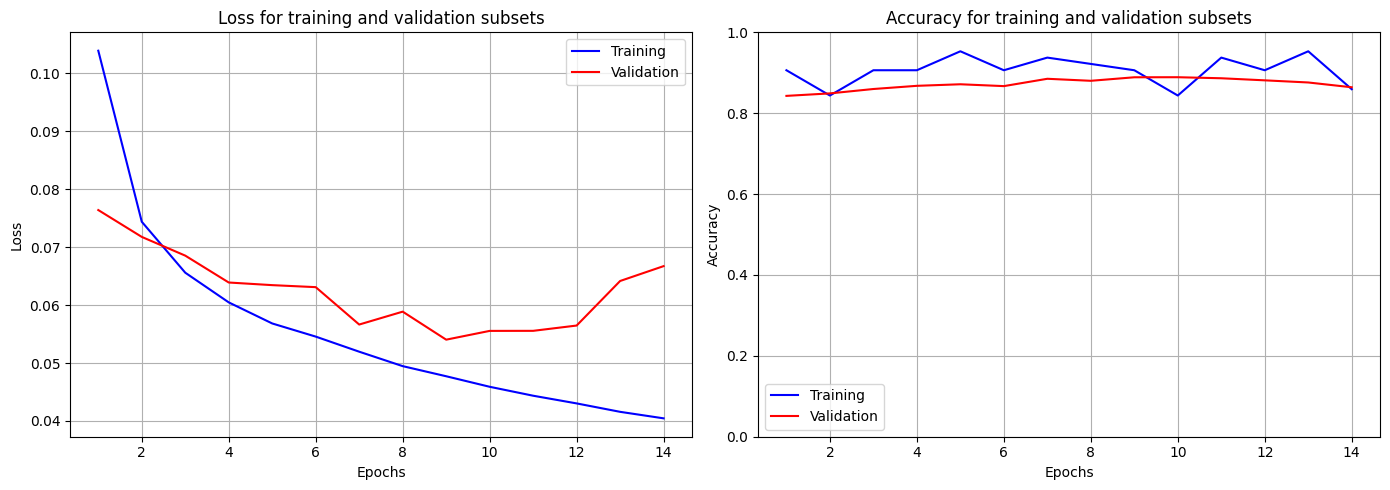

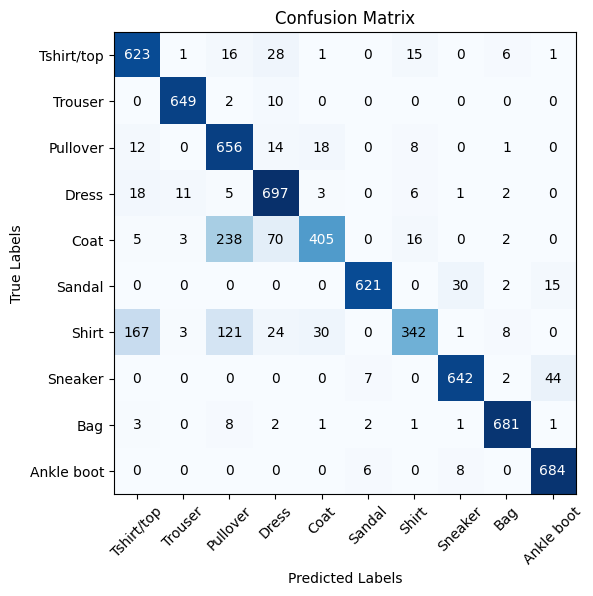

Accuracy: 0.8571428571428571
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.752415  0.901592  0.820276      691
Trouser        0.973013  0.981846  0.977410      661
Pullover       0.627151  0.925247  0.747578      709
Dress          0.824852  0.938089  0.877834      743
Coat           0.884279  0.548038  0.676692      739
Sandal         0.976415  0.929641  0.952454      668
Shirt          0.881443  0.491379  0.630996      696
Sneaker        0.939971  0.923741  0.931785      695
Bag            0.967330  0.972857  0.970085      700
Ankle boot     0.918121  0.979943  0.948025      698
weighted_avg   0.873010  0.857143  0.851286     7000


In [10]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

In [11]:
nn = NeuronalNetwork(784, layers_config)
optimizer = GDOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 128)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=60, print_every=10, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time: 10.32s | val loss 0.102 | val metric 0.801 |
| Epoch  10 | time:  8.04s | val loss 0.070 | val metric 0.858 |
| Epoch  20 | time:  6.13s | val loss 0.062 | val metric 0.876 |
Early stopping activado en la época  29


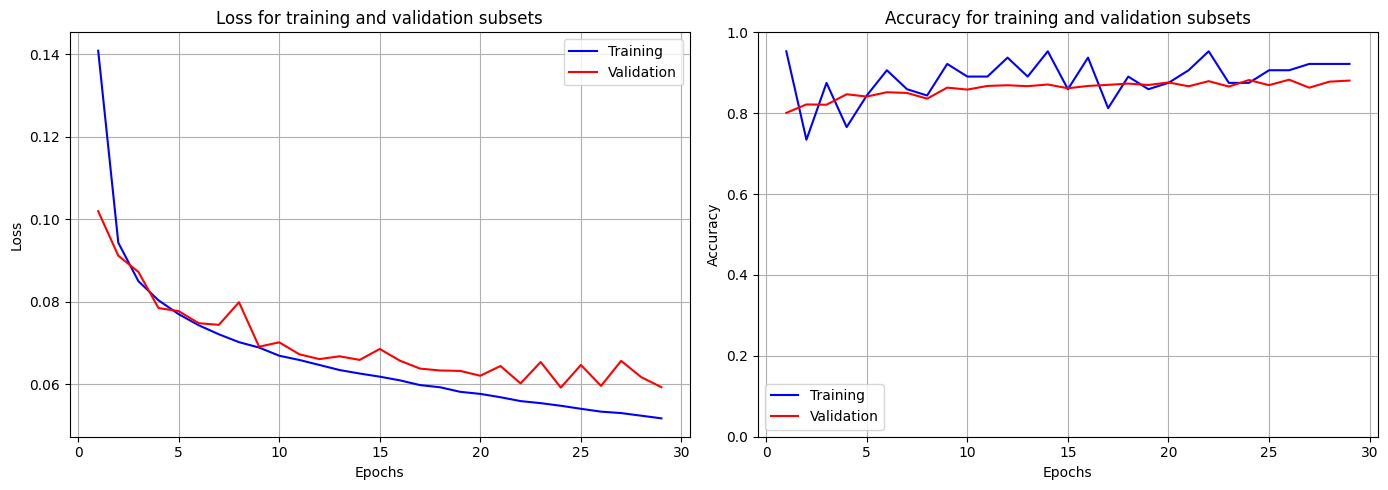

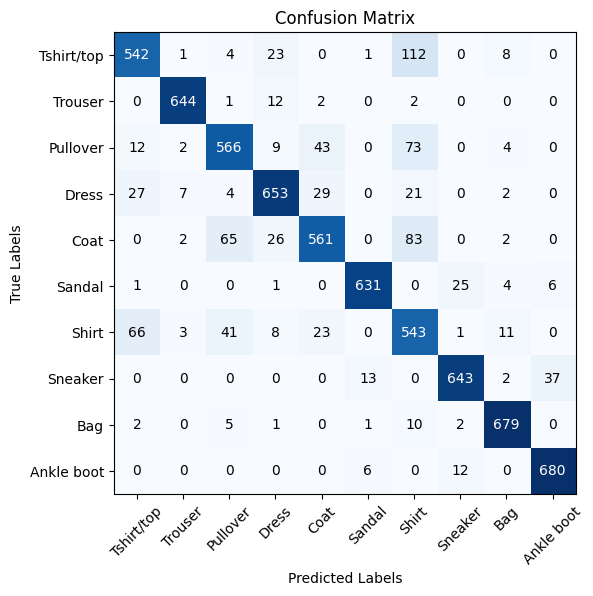

Accuracy: 0.8774285714285714
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.833846  0.784370  0.808352      691
Trouser        0.977238  0.974281  0.975758      661
Pullover       0.825073  0.798307  0.811470      709
Dress          0.890859  0.878869  0.884824      743
Coat           0.852584  0.759134  0.803150      739
Sandal         0.967791  0.944611  0.956061      668
Shirt          0.643365  0.780172  0.705195      696
Sneaker        0.941435  0.925180  0.933237      695
Bag            0.953652  0.970000  0.961756      700
Ankle boot     0.940526  0.974212  0.957072      698
weighted_avg   0.881671  0.877429  0.878451     7000


In [12]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

#### Adam Optimizer

In [13]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, X_train.shape[0])
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=260, print_every=20, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time:  2.93s | val loss 0.421 | val metric 0.325 |
| Epoch  20 | time:  2.52s | val loss 0.113 | val metric 0.758 |
| Epoch  40 | time:  2.47s | val loss 0.084 | val metric 0.821 |
| Epoch  60 | time:  2.49s | val loss 0.071 | val metric 0.858 |
| Epoch  80 | time:  2.57s | val loss 0.071 | val metric 0.852 |
Early stopping activado en la época  80


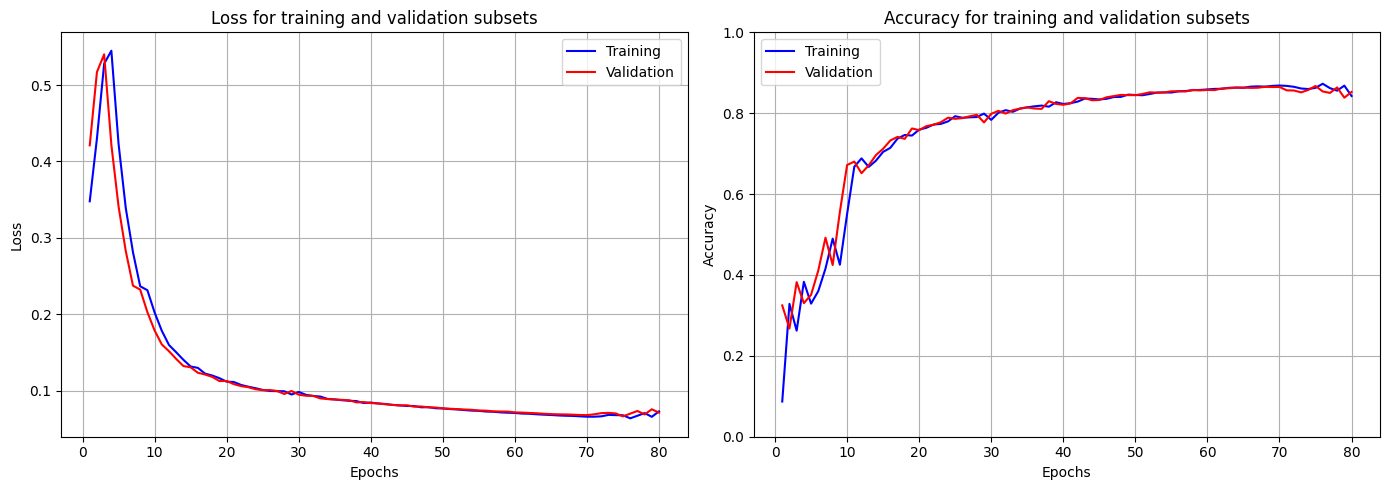

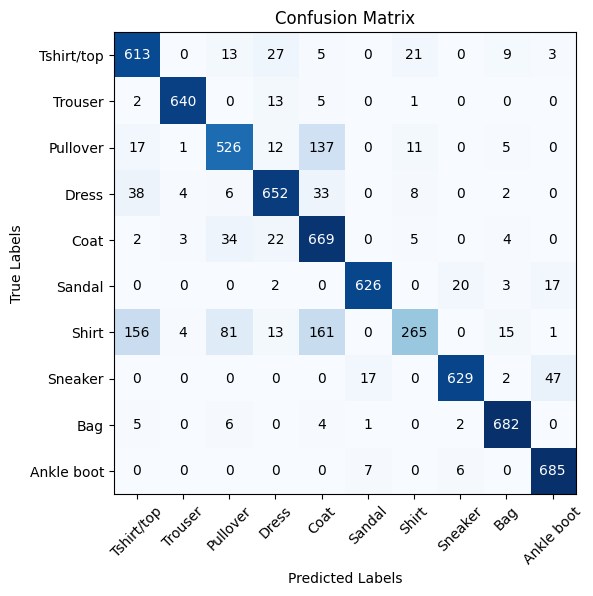

Accuracy: 0.8552857142857143
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.735894  0.887120  0.804462      691
Trouser        0.981595  0.968230  0.974867      661
Pullover       0.789790  0.741890  0.765091      709
Dress          0.879892  0.877524  0.878706      743
Coat           0.659763  0.905277  0.763263      739
Sandal         0.961598  0.937126  0.949204      668
Shirt          0.852090  0.380747  0.526316      696
Sneaker        0.957382  0.905036  0.930473      695
Bag            0.944598  0.974286  0.959212      700
Ankle boot     0.909695  0.981375  0.944176      698
weighted_avg   0.865084  0.855286  0.848171     7000


In [14]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

In [16]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 128)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=60, print_every=10, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time: 13.86s | val loss 0.070 | val metric 0.854 |
| Epoch  10 | time: 19.38s | val loss 0.054 | val metric 0.889 |
Early stopping activado en la época  19


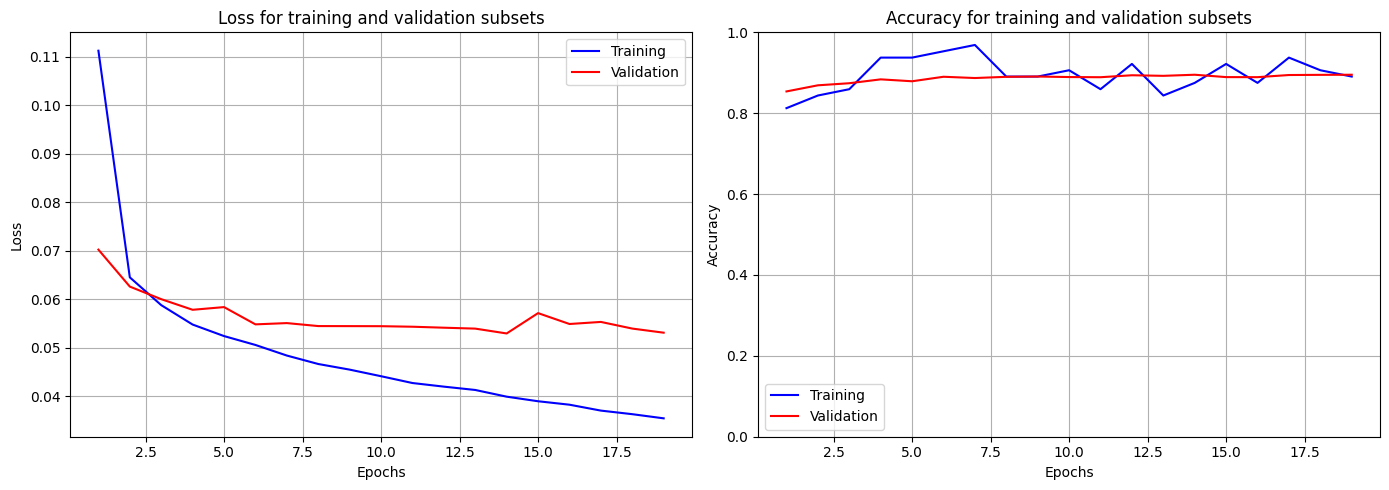

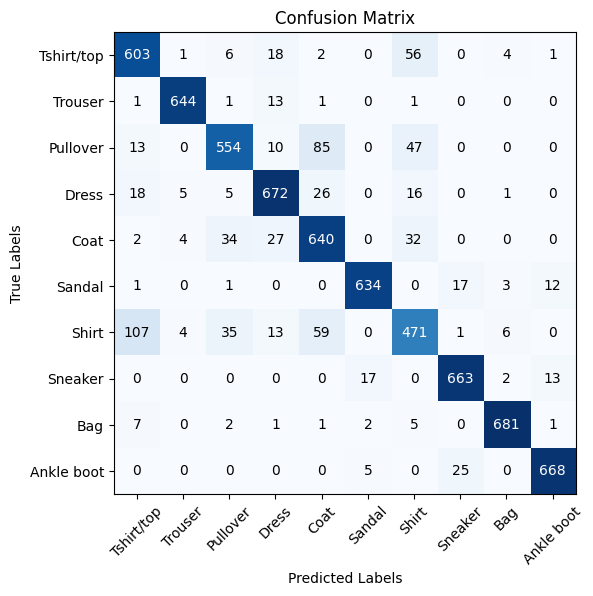

Accuracy: 0.89
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.801862  0.872648  0.835759      691
Trouser        0.978723  0.974281  0.976497      661
Pullover       0.868339  0.781382  0.822569      709
Dress          0.891247  0.904441  0.897796      743
Coat           0.786241  0.866035  0.824211      739
Sandal         0.963526  0.949102  0.956259      668
Shirt          0.750000  0.676724  0.711480      696
Sneaker        0.939093  0.953957  0.946467      695
Bag            0.977044  0.972857  0.974946      700
Ankle boot     0.961151  0.957020  0.959081      698
weighted_avg   0.890432  0.890000  0.889428     7000


In [17]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

In [19]:
nn = NeuronalNetwork(784, layers_config)
optimizer = AdamOptimizer(learning_rate=0.0005)
trainer = Trainer(nn, optimizer, cross_entropy_loss, cross_entropy_loss_grad, accuracy_evaluate, 128)
loss, acc, val_info = trainer.train(X_train, Y_train,X_val,Y_val, epochs=60, print_every=10, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time: 12.18s | val loss 0.078 | val metric 0.839 |
| Epoch  10 | time: 18.95s | val loss 0.054 | val metric 0.892 |
| Epoch  20 | time: 18.14s | val loss 0.051 | val metric 0.897 |
| Epoch  30 | time: 30.65s | val loss 0.052 | val metric 0.898 |
Early stopping activado en la época  31


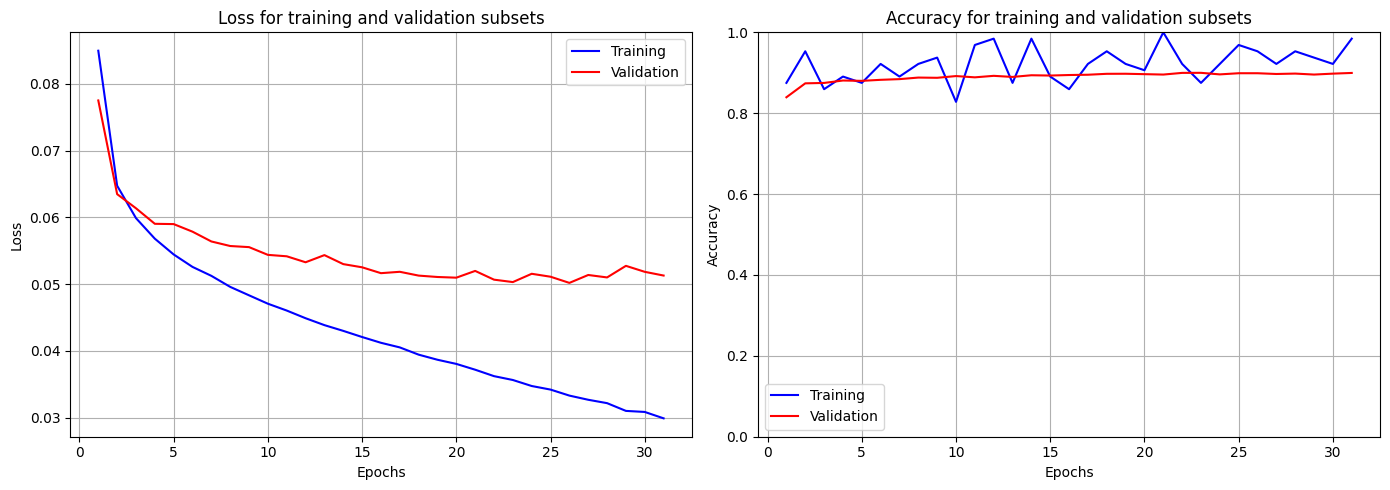

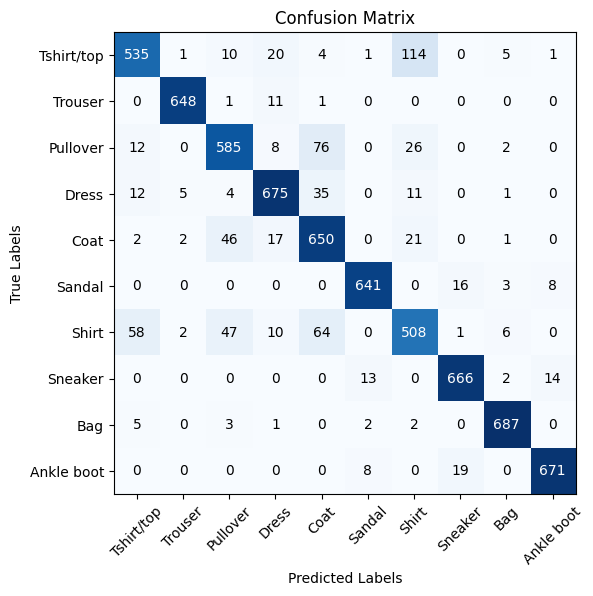

Accuracy: 0.8951428571428571
              precision    recall  f1_score  support
class                                               
Tshirt/top     0.857372  0.774240  0.813688      691
Trouser        0.984802  0.980333  0.982563      661
Pullover       0.840517  0.825106  0.832740      709
Dress          0.909704  0.908479  0.909091      743
Coat           0.783133  0.879567  0.828553      739
Sandal         0.963910  0.959581  0.961740      668
Shirt          0.744868  0.729885  0.737300      696
Sneaker        0.948718  0.958273  0.953472      695
Bag            0.971711  0.981429  0.976546      700
Ankle boot     0.966859  0.961318  0.964080      698
weighted_avg   0.895816  0.895143  0.894954     7000


In [20]:
train_info = {'loss': loss, 'acc': acc}
plot_training_history_with_validation(train_info, val_info)
Y_pred = predict(nn, X_test)
accuracy, metrics = calculate_metrics(Y_pred, Y_test, class_labels=labels)
confusion_matrix(Y_test, Y_pred, class_labels=labels, incline=True)
print_metrics(accuracy,metrics)

## REGRESSION

In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

from clases.Trainer import Trainer
from clases.NeuronalNetwork import NeuronalNetwork
from clases.ActivationFunction import *
from clases.Optimizer import *
from clases.LossFunction import *
from clases.Test import *

import warnings
warnings.filterwarnings("ignore")

# Dataset Info: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html
california_housing = fetch_california_housing(as_frame=True)

In [2]:
california_housing.data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [3]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
data = np.hstack((california_housing.target.values.reshape(-1, 1), california_housing.data.values))

In [5]:
m, n = data.shape
np.random.seed(42)  # For reproducibility
np.random.shuffle(data)

test_size = int(0.1 * m)
data_test = data[:test_size, :].T  # El 10% inicial para el conjunto de prueba

remaining_data = data[test_size:, :]

train_size = int(0.8 * m)
data_train = remaining_data[:train_size, :].T  # El siguiente 80% para entrenamiento
data_validation = remaining_data[train_size:, :].T  # El resto 10% para validación

X_train, Y_train = data_train[1:].T, data_train[0]
X_val, Y_val = data_validation[1:].T, data_validation[0]
X_test, Y_test = data_test[1:].T, data_test[0]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train)
X_val_norm = scaler.transform(X_val)
X_test_norm = scaler.transform(X_test)

In [7]:
layers_config = [
    {'output_size': 128, 'activation': ReLU},
    {'output_size': 64, 'activation': ReLU},
    {'output_size': 32, 'activation': ReLU},
    {'output_size': 1, 'activation': Linear}
]

In [8]:
nn = NeuronalNetwork(8, layers_config)
optimizer = GDOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, mean_squared_error, mean_squared_error_grad, mse_evaluate, X_train_norm.shape[0])
loss, acc, val_info = trainer.train(X_train_norm, Y_train,X_val_norm,Y_val, epochs=210, print_every=15, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time:  1.32s | val loss (MSE) 3.935 | Residual Mean 0.637 |
Early stopping activado en la época  11


In [9]:
Y_pred = predict(nn, X_test_norm)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 2.352170711646953
R2: 0.33311774870615407


In [12]:
nn = NeuronalNetwork(8, layers_config)
optimizer = GDOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, mean_squared_error, mean_squared_error_grad, mse_evaluate, 128)
loss, acc, val_info = trainer.train(X_train_norm, Y_train,X_val_norm,Y_val, epochs=210, print_every=15, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time:  0.10s | val loss (MSE) 6.308 | Residual Mean 0.141 |
Early stopping activado en la época   8


In [13]:
Y_pred = predict(nn, X_test_norm)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 2.2667617364150576
R2: 0.698081622590013


In [14]:
nn = NeuronalNetwork(8, layers_config)
optimizer = AdamOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, mean_squared_error, mean_squared_error_grad, mse_evaluate, X_train_norm.shape[0])
loss, acc, val_info = trainer.train(X_train_norm, Y_train,X_val_norm,Y_val, epochs=210, print_every=15, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time:  1.34s | val loss (MSE) 3.570 | Residual Mean 0.272 |
Early stopping activado en la época   9


In [15]:
Y_pred = predict(nn, X_test_norm)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 2.452034941465898
R2: 0.30116545523599303


In [16]:
nn = NeuronalNetwork(8, layers_config)
optimizer = AdamOptimizer(learning_rate=0.01)
trainer = Trainer(nn, optimizer, mean_squared_error, mean_squared_error_grad, mse_evaluate, 256)
loss, acc, val_info = trainer.train(X_train_norm, Y_train,X_val_norm,Y_val, epochs=210, print_every=15, early_stopping=True, patience=5, min_delta=1e-4)

| Epoch   1 | time:  0.22s | val loss (MSE) 2.683 | Residual Mean 0.056 |
Early stopping activado en la época   8


In [17]:
Y_pred = predict(nn, X_test_norm)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 2.36656734539987
R2: 0.7535699129869096
